In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
data1 = pd.read_csv('ex2data1.txt',header=None,delimiter=',',names=('exam1','exam2','isAdmitted'))

In [3]:
data1.insert(0,'ones',1)
data1.head()
data1.shape

(100, 4)

In [4]:
pos = data1[data1['isAdmitted']==1]
neg = data1[data1['isAdmitted']==0]
pos.head(),neg.head()

(   ones      exam1      exam2  isAdmitted
 3     1  60.182599  86.308552           1
 4     1  79.032736  75.344376           1
 6     1  61.106665  96.511426           1
 7     1  75.024746  46.554014           1
 8     1  76.098787  87.420570           1,
     ones      exam1      exam2  isAdmitted
 0      1  34.623660  78.024693           0
 1      1  30.286711  43.894998           0
 2      1  35.847409  72.902198           0
 5      1  45.083277  56.316372           0
 10     1  95.861555  38.225278           0)

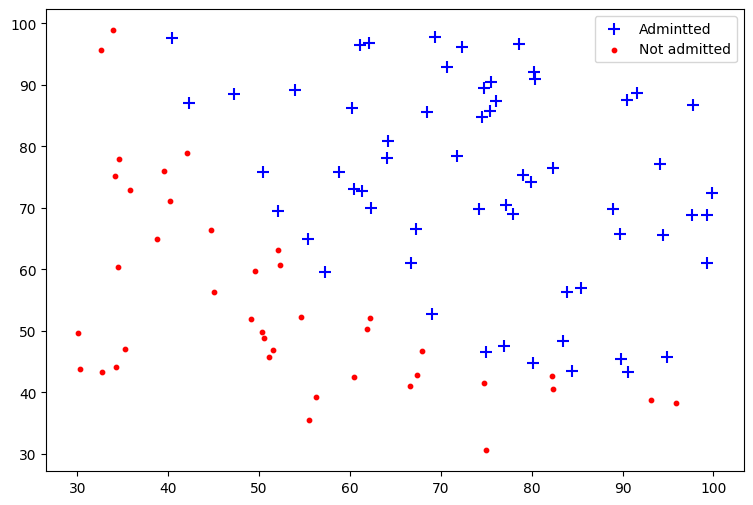

In [5]:
fig,ax = plt.subplots(figsize=(9,6))
ax.scatter(pos.exam1,pos.exam2,c='b', marker='+', facecolors='y', s=70,label='Admintted')
ax.scatter(neg.exam1,neg.exam2,c='r', marker='o', facecolors='y', s=10,label='Not admitted')
ax.legend(loc='upper right')

# 定义sigmoid函数
$\Huge g\left( z \right)=\frac{1}{1+{{e}^{-z}}}$

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [7]:
xsigtest = np.array(range(-10,10,1))
xsigtest

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

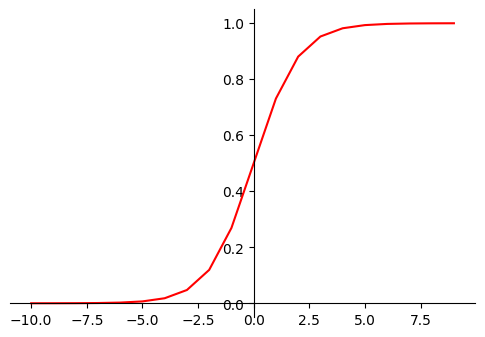

In [8]:
sigtest,sigax = plt.subplots(figsize=(6,4))
sigax.spines['left'].set_position('zero')
sigax.spines['bottom'].set_position('zero')
sigax.spines['right'].set_color('none')
sigax.spines['top'].set_color('none')
sigax.plot(xsigtest,sigmoid(xsigtest),c='r')

# 定义获得cost和gradient函数
## cost:
$\Huge J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$
## gradient:
$\huge \frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$

In [9]:
def getCost(theta,X,y):
    theta = theta.reshape(-1, 1)
    m = len(X)
    cost = (-y.T@np.log(sigmoid(X@theta))-(1-y).T@np.log(1-sigmoid(X@theta)))/m
    return cost[0,0]
def getGradient(theta,X,y):
    theta = theta.reshape(-1, 1)
    m = len(X)
    gradient = X.T@(sigmoid(X@theta)-y)/m
    return gradient

In [10]:
X = np.array(data1.loc[:,['ones','exam1','exam2']])
y = np.array(data1.loc[:,['isAdmitted']])
iniTheta = np.zeros(3)
print(X.shape,y.shape,iniTheta.shape)

(100, 3) (100, 1) (3,)


In [11]:
getCost(iniTheta,X,y,),getGradient(iniTheta,X,y)

(0.6931471805599453,
 array([[ -0.1       ],
        [-12.00921659],
        [-11.26284221]]))

In [12]:
# import scipy.optimize as opt
# result1 = opt.fmin_tnc(func=getCost, x0=iniTheta, fprime=getGradient, args=(X, y))
# result1

In [13]:
from scipy.optimize import minimize

result2 = minimize(getCost, x0=iniTheta, args=(X, y), method='TNC', jac=getGradient)
result2

 message: Local minimum reached (|pg| ~= 0)
 success: True
  status: 0
     fun: 0.20349770158947536
       x: [-2.516e+01  2.062e-01  2.015e-01]
     nit: 17
     jac: [[ 9.005e-09]
           [ 8.639e-08]
           [ 4.721e-07]]
    nfev: 36

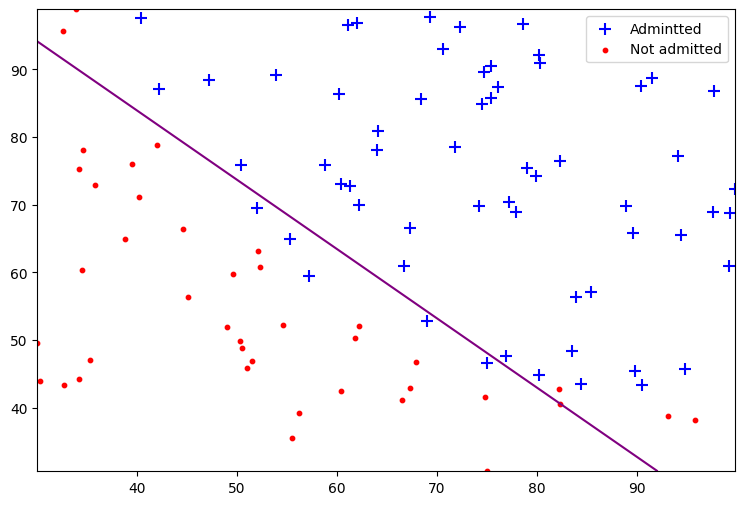

In [14]:
fig,ax = plt.subplots(figsize=(9,6))
ax.scatter(pos.exam1,pos.exam2,c='b', marker='+', facecolors='y', s=70,label='Admintted')
ax.scatter(neg.exam1,neg.exam2,c='r', marker='o', facecolors='y', s=10,label='Not admitted')

exam1_min = X[:,1].min()
exam1_max = X[:,1].max()
exam2_min = X[:,2].min()
exam2_max = X[:,2].max()
## 获得x轴和y轴的网格值
exam1_mesh, exam2_mesh = np.meshgrid(np.linspace(exam1_min, exam1_max, 100), np.linspace(exam2_min, exam2_max, 100))
## 将x轴的值和Y的值两两结合，构建出一个类似1，x1(i),x2(i)的数据结构哦X_ax
X_ax = np.c_[np.ones(exam1_mesh.ravel().shape[0]), exam1_mesh.ravel(), exam2_mesh.ravel()]
## 根据X_ax预测可能性h(x),即sigmoid值，theta已求得最优值，X已构建，sigmoid(X_ax@theta.T)
## 求得后，将其变成与网格一样的形状
h_mesh = sigmoid(X_ax@result2.x).reshape(exam2_mesh.shape)

## 将j_mesh为0.5的网格点连接起来
ax.contour(exam1_mesh, exam2_mesh, h_mesh, levels=[0.5], colors='purple')
ax.legend(loc='upper right')
plt.show()

In [15]:
def predictAcc(X,y,theta):
    theta = theta.reshape(-1,1)
    result = sigmoid(X@theta)>0.5
    correctNum = np.sum(result == y)
    acc = correctNum/len(X)
    return acc

In [16]:
predictAcc(X,y,result2.x)

0.89

In [17]:
data2 = pd.read_csv('ex2data2.txt',header = None,names=('t1','t2','isAccepted'))
data2.head()

,t1,t2,isAccepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [18]:
d2_pos = data2[data2['isAccepted']==1]
d2_neg = data2[data2['isAccepted']==0]

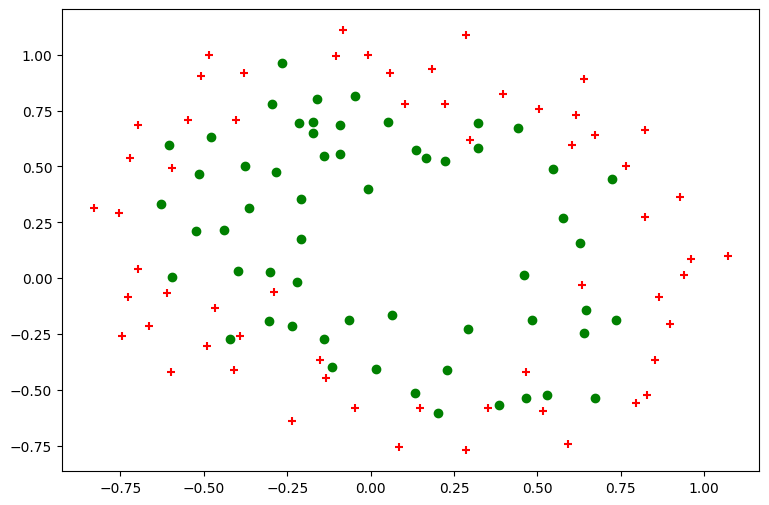

In [19]:
d2fig,d2ax = plt.subplots(figsize=(9,6))
d2ax.scatter(d2_pos.t1,d2_pos.t2,c = 'g',marker='o',label='Accepted')
d2ax.scatter(d2_neg.t1,d2_neg.t2,c = 'r',marker='+',label='Not accepted')

## maping the X

In [20]:
data2.head()

,t1,t2,isAccepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [21]:
def data2mf(data2,degree):
    data2 = np.array(data2)
    df = pd.DataFrame()
    for i in range(degree+1): 
        for j in range(i+1):
            df[f'F{i-j}{j}'] = (data2[:,0]**(i-j))*(data2[:,1]**j)
    return df

In [22]:
df2 = data2mf(data2,6)
df2.head()

,F00,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


## regularized cost（正则化代价函数）
$\huge J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}$

In [23]:
def reCost(theta,X,y,lamda):
    m = len(y)
    theta = theta.reshape(-1,1)
    noRe_cost = getCost(theta,X,y)
    re = np.sum(theta[1:,:]**2)*lamda/(2*m)
    reCost = noRe_cost+re
    return reCost

## regularized gradient（正则化梯度函数）
如果我们要使用梯度下降法令这个代价函数最小化，因为我们未对${{\theta }_{0}}$ 进行正则化，所以梯度下降算法将分两种情形：
\begin{align}
  & Repeat\text{ }until\text{ }convergence\text{ }\!\!\{\!\!\text{ } \\ 
 & \text{     }{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} \\ 
 & \text{     }{{\theta }_{j}}:={{\theta }_{j}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}} \\ 
 & \text{          }\!\!\}\!\!\text{ } \\ 
 & Repeat \\ 
\end{align}

对上面的算法中 j=1,2,...,n 时的更新式子进行调整可得： 
${{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}$


In [24]:
def reGradient(theta,X,y,lamda):
    theta = theta.reshape(-1,1)
    noRe_gradient = getGradient(theta,X,y)
    re = lamda/len(y)*theta
    reGradient = noRe_gradient + re
    reGradient[0,0] =  noRe_gradient[0,0]
    return reGradient.ravel()

## 初始化变量

In [25]:
def hfunc(X,theta):
    X = np.array(data2mf(X,6))
    theta = theta.reshape(-1,1)
    hvalues = sigmoid(X@theta)

    return hvalues

def plotPredict(X,y,axes,hFunc,theta):
    x1_min = X[:,1].min()
    x1_max = X[:,1].max()
    x2_min = X[:,2].min()
    x2_max = X[:,2].max()

    # 获得需要计算的网格点
    x1_mesh,x2_mesh = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
    X_mesh = np.c_[x1_mesh.ravel(), x2_mesh.ravel()]

    # 计算网格点对应的h值
    
    h_mesh = hFunc(X_mesh,theta).reshape(x1_mesh.shape)

    d2ax.contour(x1_mesh, x2_mesh, h_mesh, levels=[0.5], colors='purple') 

In [26]:
X2 = np.array(df2)
y2 = np.array(data2.isAccepted).reshape(-1,1)
iniTheta2 = np.zeros(X2.shape[1])
lamda = 1

In [27]:
reCost(iniTheta2,X2,y2,lamda)

0.6931471805599454

 message: Converged (|f_n-f_(n-1)| ~= 0)
 success: True
  status: 1
     fun: 0.505167930611608
       x: [ 1.487e+00  7.987e-01 ... -2.036e-01 -1.039e+00]
     nit: 7
     jac: [-5.376e-08  3.062e-06 ... -2.646e-08  4.146e-07]
    nfev: 34
0.8305084745762712


<Figure size 640x480 with 0 Axes>

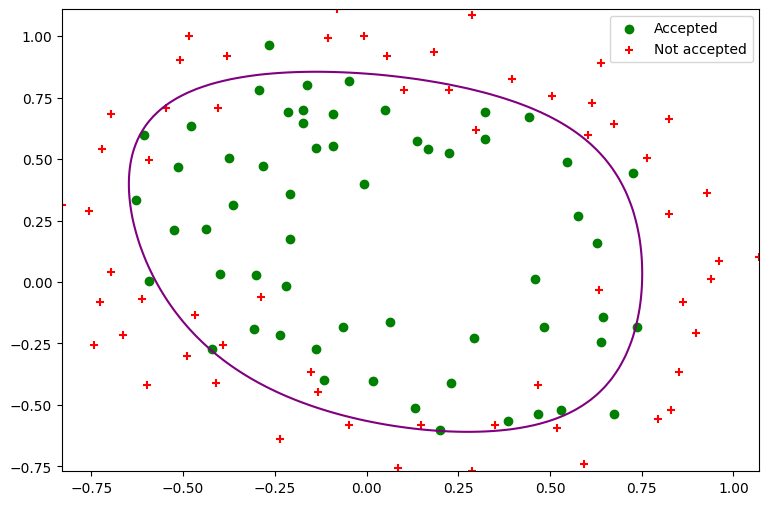

In [63]:
lamda = 0.7
reResult = minimize(reCost, x0=iniTheta2, args=(X2, y2,lamda), jac=reGradient, method='TNC')
print(reResult)
print(predictAcc(X2,y2,reResult.x))
# import scipy.optimize as opt
# reResult = opt.fmin_tnc(func=reCost, x0=iniTheta2, fprime=reGradient, args=(X2, y2, lamda))
# reResult

plt.clf()

d2fig,d2ax = plt.subplots(figsize=(9,6))
d2ax.scatter(d2_pos.t1,d2_pos.t2,c = 'g',marker='o',label='Accepted')
d2ax.scatter(d2_neg.t1,d2_neg.t2,c = 'r',marker='+',label='Not accepted')

d2ax.legend(loc='upper right')
plotPredict(X2,y2,d2ax,hfunc,reResult.x)
plt.show()

In [29]:
# d2fig,d2ax = plt.subplots(figsize=(9,6))
# d2ax.scatter(d2_pos.t1,d2_pos.t2,c = 'g',marker='o',label='Accepted')
# d2ax.scatter(d2_neg.t1,d2_neg.t2,c = 'r',marker='+',label='Not accepted')

# test1_min = X2[:,1].min()
# test1_max = X2[:,1].max()
# test2_min = X2[:,2].min()
# test2_max = X2[:,2].max()
# ## 获得x轴和y轴的网格值
# test1_mesh, test2_mesh = np.meshgrid(np.linspace(test1_min, test1_max, 100), np.linspace(test2_min, test2_max, 100))
# ## 将x轴的值和Y的值两两结合，构建出一个类似1，x1(i),x2(i)的数据结构哦X_ax
# d2_mesh = np.c_[np.ones(test1_mesh.ravel().shape[0]), test1_mesh.ravel(), test2_mesh.ravel()]
# ## 根据X_ax预测可能性h(x),即sigmoid值，theta已求得最优值，X已构建，sigmoid(X_ax@theta.T)
# ## 求得后，将其变成与网格一样的形状
# rej_mesh = sigmoid(d2_ax@reResult.x).reshape(test2_mesh.shape)

# ## 将j_mesh为0.5的网格点连接起来
# d2ax.contour(test1_mesh, test2_mesh, rej_mesh, levels=[0.5], colors='purple')
# d2ax.legend(loc='upper right')
# plt.show()

In [30]:
# test1_min = X2[:,1].min()
# test1_max = X2[:,1].max()
# test2_min = X2[:,2].min()
# test2_max = X2[:,2].max()

# ## 获得x轴和y轴的网格值
# test1_mesh, test2_mesh = np.meshgrid(np.linspace(test1_min, test1_max, 100), np.linspace(test2_min, test2_max, 100))
# ## 将x轴的值和Y的值两两结合，构建出一个类似1，x1(i),x2(i)的数据结构哦X_ax
# d2mesh = np.c_[test1_mesh.ravel(), test2_mesh.ravel()]
# d2mesh_pd = pd.DataFrame(d2mesh,columns=('t1','t2'))
# meshFeature = np.array(data2mf(d2mesh_pd,6))
# print(meshFeature.shape)
# reHmesh = sigmoid(meshFeature@reResult.x.reshape(-1,1)).reshape(test1_mesh.shape)


# d2fig,d2ax = plt.subplots(figsize=(9,6))
# d2ax.scatter(d2_pos.t1,d2_pos.t2,c = 'g',marker='o',label='Accepted')
# d2ax.scatter(d2_neg.t1,d2_neg.t2,c = 'r',marker='+',label='Not accepted')

# import matplotlib.lines as mlines
# sample_contour = mlines.Line2D([], [], color='purple', label='Decision Boundary')
# d2ax.add_line(sample_contour)

# ## 将j_mesh为0.5的网格点连接起来
# d2ax.contour(test1_mesh, test2_mesh, reHmesh, levels=[0.5], colors='purple')
# d2ax.legend(loc='upper right')
# plt.show()